# Early Prediction of Sepsis
**Table of Contents**
<ol>
<li><a href="#Introduction">Introduction</a></li>
    Dataset. Sepsis Predictors.
<li><a href="#Exploratory-Analysis">Exploratory Analysis</a></li>
    Data Cleaning. Descriptive Statistics. Data Missingness. Temporal Pattern of Physiological Variables.
<li><a href="#Data-Preprocessing">Data Preprocessing</a></li>
    Imputation. Effect of Imputation on Correlated Variables. Feature Engineering. Addressing Imbalanced Classes.
<li><a href='#The-Model'>The Model</a></li>
    Model Selection. Metrics. Hyperparameter Tuning. Performance Evaluation.
<li><a href="#Discussion">Discussion</a></li>
    Comparison with Challenge Project Results. Conclusions and Future Work.
<li><a href='#References'>References</li>
    References for all sections.
</ol>

# Introduction

The work presented here is an analysis of the *physionet_sepsis* dataset available on [OpenML](https://www.openml.org/search?type=data&sort=qualities.NumberOfMissingValues&status=active&qualities.NumberOfFeatures=between_10_100&id=46817). The dataset was made available for the [Early Prediction of Sepsis from Clinical Data: The PhysioNet/Computing in Cardiology Challenge 2019](https://physionet.org/content/challenge-2019/1.0.0/). Included here are: an exploratory analysis, with a discussion of missing data mechanisms, data preprocessing with imputation and feature engineering, model fitting and tuning, and performance evaluation. 

**Disclaimer.** The work presented here is my own. Artificial intelligence was used to conduct literature search and for the purpose of data analysis. The Jupyter Notebooks are available upon request via my profile on LinkedIn.

**Terminology.** Throughout this report, the term *feature* denotes the columns in the dataset, with the exception of the column that contains the label, whereas *observation* refers to the rows in the dataset. *Target* refers to the outcome or the label of the data, 0 (if disease absent), or 1 (if disease present).

## The Dataset
The goal of the Challenge was to develop algorithms for the early prediction of sepsis using routinely available clinical data, such as heart rate, respiration rate, blood counts, etc. The researchers obtained the data from three geographically distinct U.S. hospital systems. The data were collected over the past decade, then deidentified (i.e., all information that could identify a patient was removed) and labeled using Sepsis-3 clinical criteria. Data and labels for 40,336 patients from two of the hospital systems A and B were posted publicly for download, and data and labels for 24,819 patients from all three hospital systems were kept as hidden test set C.

The Challenge data consisted of a combination of 8 vital sign summaries, 26 laboratory values, and 6 demographic variables (**Table 1**). Data extracted from the electronic records underwent a series of preprocessing steps. All patient features were condensed into hourly bins; if there were multiple measurements within an an hourly time window, they were summarized as the median value. Patients with less than 8 hourly time windows of data in the intensive care unit (ICU) were not included, and patients who developed sepsis less than 4 hours after ICU admission were not included. Patient records were truncated after ICU discharge, and hourly time windows were truncated to 2 weeks. Furthermore, missing and erroneous data were intentionally preserved as part of the Challenge. The goal was to predict sepsis onset within a 6-hour window. 

**Table 1: Data dictionary**
___
<table>
<tr><td>$\textbf{Feature}$</td><td>$\textbf{Description}$</td></tr>
<tr><td>HR  </td><td>Heart rate (beats per minute)</td></tr>
<tr><td>O2Sat</td><td>Pulse oximetry (%)</td></tr>
<tr><td>Temp</td><td>Temperature (Deg C)</td></tr>
<tr><td>SBP</td><td>Systolic BP (mm Hg)</td></tr>
<tr><td>MAP</td><td>Mean arterial pressure (mm Hg)</td></tr>
<tr><td>DBP</td><td>Diastolic BP (mm Hg)</td></tr>
<tr><td>Resp</td><td>Respiration rate (breaths per minute)</td></tr>
<tr><td>EtCO2</td><td>End tidal carbon dioxide (mm Hg)</td></tr>
<tr><td>BaseExcess</td><td>Measure of excess bicarbonate (mmol/L) </td></tr>
<tr><td>HCO3</td><td>Bicarbonate (mmol/L)</td></tr>
<tr><td>FiO2</td><td>Fraction of inspired oxygen (%)</td></tr>
<tr><td>pH</td><td>N/A</td></tr>
<tr><td>PaCO2</td><td>Partial pressure of carbon dioxide from arterial blood (mm Hg)</td></tr>
<tr><td>SaO2</td><td>Oxygen saturation from arterial blood (%)</td></tr>
<tr><td>AST</td><td>Aspartate transaminase (IU/L)</td></tr>
<tr><td>BUN</td><td>Blood urea nitrogen (mg/dL)</td></tr>
<tr><td>Alkalinephos</td><td>Alkaline phosphatase (IU/L)</td></tr>
<tr><td>Calcium</td><td>(mg/dL)</td></tr>
<tr><td>Chloride</td><td>(mmol/L)</td></tr>
<tr><td>Creatinine</td><td>(mg/dL)</td></tr>
<tr><td>Bilirubin_direct</td><td>Bilirubin direct (mg/dL)</td></tr>
<tr><td>Glucose</td><td> Serum glucose (mg/dL)</td></tr>
<tr><td>Lactate</td><td>Lactic acid (mg/dL)</td></tr>
<tr><td>Magnesium </td><td> (mmol/dL) </td></tr>
<tr><td> Phosphate</td><td>(mg/dL) </td></tr>
<tr><td> Potassium  </td><td> (mmol/L) </td></tr>
<tr><td>Bilirubin_total</td><td>Total bilirubin (mg/dL) </td></tr>
<tr><td>TroponinI </td><td> Troponin I (ng/mL)  </td></tr>
<tr><td> Hct</td><td>Hematocrit (%)</td></tr>
<tr><td> Hgb</td><td> Hemoglobin (g/dL) </td></tr>
<tr><td> PTT</td><td> partial thromboplastin time (seconds)</td></tr>
<tr><td> WBC </td><td> Leukocyte count (count*10^3/µL)  </td></tr>
<tr><td> Fibrinogen </td><td>(mg/dL)   </td></tr>
<tr><td>  Platelets </td><td>  (count*10^3/µL) </td></tr>
<tr><td>  Age </td><td> Years (100 for patients 90 or above)  </td></tr>
<tr><td> Gender </td><td> Female (0) or Male (1)</td></tr>
<tr><td>Unit1  </td><td>Administrative identifier for ICU unit (MICU)</td></tr>
<tr><td>Unit2  </td><td>  Administrative identifier for ICU unit (SICU)   </td></tr>
<tr><td>HospAdmTime  </td><td>  Hours between hospital admit and ICU admit  </td></tr>
<tr><td>ICULOS</td><td>ICU length-of-stay (hours since ICU admit)</td></tr>
<tr><td>SepsisLabel</td><td>Sepsis patients: </td></tr>
<tr><td></td><td>0, if t < tsepsis−6 </td></tr>
<tr><td></td><td>1, if t ≥ tsepsis−6 </td></tr>
<tr><td></td><td>Non-sepsis patients: 0</td></tr>
</table>

## Sepsis Predictors
Sepsis is a life-threatening condition that occurs when the response of the human body to infection causes tissue damage, organ failure, or death. Early detection and treatment are critical, as each hour of delayed treatment has been associated with approximately a 4 - 8% increase in mortality. Key clinical indicators of sepsis include fever or hypothermia (body core temperature below 35.0 C (95.0 F)), tachycardia (increased heart rate), tachypnea (increased respiratory rate), confusion, and low blood pressure. Its clinical presentation includes non-specific symptoms, which along with the absence of a definitive diagnostic test, make sepsis difficult to diagnose, despite its severity.

The Sequential Organ Failure Assessment (SOFA) score is a tool used to track a patient's organ function and failure during an ICU stay. SOFA was developed and validated to assess the acute morbidity of critical illness at population level and it is now used as a key criterion in the diagnosis of the sepsis. The SOFA score consists of the ratio of arterial oxygen partial pressure (PaO2) to the fraction of inspired oxygen (FiO2), platelet count, bilirubin, mean arterial pressure, Glasgow coma scale (eye opening, verbal response, and the best motor response), creatinine, and urine output.

The shock index, defined as the ratio of heart rate to systolic blood pressure, is a well-established metric in critical care, and a valuable predictor for sepsis. It has demonstrated better predictive power than conventional vital signs alone for identifying the need for higher levels of care, as well as early mortality. Indices based on mean arterial pressure and diastolic pressure have also emerged as valuable predictors. The shock index is an early warning sign in the initial phase of sepsis, when compensatory physiological mechanisms maintain blood pressure. Values above 0.7 are associated with adverse outcomes and values above 1.0 correlate with hyperlactatemia (elevated lactate), a marker of sepsis severity and poor prognosis. 

Lactate is a salt of lactic acid produced mainly by the breakdown of glucose under anaerobic conditions, recognized as a significant marker of inflammation due to its accumulation in tissues during inflammatory processes. While creatinine is not regarded as an inflammation marker, it is produced by muscle breakdown, which is accelerated in sepsis. Phosphate is increasingly associated with inflammation and cardiovascular disease. The white blood count is a well-known marker of inflammatory processes, but is not specific to sepsis. Fibrinogen is recognized as a biomarker of inflammation, indicating the presence of inflammatory conditions or infections in the body. Platelets play significant roles in inflammation and immune responses; thrombocytopenia (low platelet count) is common in sepsis and is recognized as an early predictor of poor prognosis in sepsis. Monitoring the dynamics of platelet counts, especially in the first 24 hours after ICU admission, is crucial for early intervention.

Ratios of important variables have clinical significance in relations to sepsis and its outcomes. In addition to the shock index discussed earlier, the lactate-to-hematocrit ratio (LHR) and blood urea nitrogen-to-creatinine ratio (BCR) have also emerged as markers with having predictive value. LHR has been found to have superior predictive ability compared to blood lactate or hematocrit alone, while BCR was identified as a prognostic biomarker for septic shock patients.

Heart rate variability, an indirect measure of autonomic nervous system regulation, also correlates with the severity of sepsis, but its analysis requires elements not present or usable in this context (R-R interval, frequency spectra). Hemoglobin levels can be used to inform on the prognosis of patients with sepsis, with the caveat that hemoglobin presents 20 - 25% diurnal variations.

Machine learning models have emerged as promising tools for detecting and managing sepsis. A number of important sepsis predictors are supported by machine learning research.  For example, a 2023 systematic review on machine learning approaches for predicting sepsis in ICU found that age, creatinine levels, and sodium levels were the most frequently used predictors, followed by blood pressure, platelet levels, and heart rate. Other frequently-used predictors included: lactate levels, temperature, white blood cell count, respiratory rate, SOFA score, glucose, hemoglobin, mean cell hemoglobin concentration, arterial oxygen and carbon dioxide partial pressures, ICU length of stay, lymphocyte count, blood urea nitrogen levels, cancer diagnosis, and sex.

# Exploratory Analysis

## Data Cleaning

The dataset, consisting of 1,552,210 observations (rows) for 40,336 unique patients, was provided as ARFF (Attribute-Relation File Format), a text file format used by the Weka machine learning software. It contained a few more columns in addition to what is described in **Table 1.** A large number of missing values was observed in the data, with many variables having over 80% missing entries. 

The following initial operations were performed on the data:
* Removal of duplicated columns and rows where applicable;
* Renaming of columns such that their names were shorter and consisted of relevant terminology and units where possible;
* Type conversions for some of the features and target variable *SepsisLabel*.

## Descriptive Statistics

The features in this dataset were characterized by mostly leptokurtic (fat-tailed) skewed distributions with various degrees of departure from normality. With the exception of feature *FiO2* (fraction of inspired oxygen), skewness ranges were -4.2 - 15.3 for the non-sepsis group, and -3 to 6.6 for the sepsis group, while kurtosis ranged from -0.2 to 559.3 (non-sepsis) and from -0.2 to 83.4  (sepsis). Upon inspection, unusual values of -50 and 4000 were revealed for feature *FiO2*, when the typical value is 21% and cannot exceed 100%. This feature likely contained recording errors, which were allowed by the study authors, as mentioned in the Introduction. As **Table 2** illustrates for a few features, distributions shapes and measures of central tendency were different between the two diagnostic groups for most of the features. 

**Table 2** displays the features sorted in descending order of the difference in median values between the two diagnostic groups. Note that the top features are also markers of inflammation and/or organ damage (liver, kidney).

**Table 2. Descriptive statistics for numerical features.** Numbers 0 and 1 in parantheses indicate the diagnostic group (0 = non-sepsis,1 = sepsis).
___

In [62]:
np.round(result,1).head(6)

,Feature,Mean (0),Mean (1),Median (0),Median (1),Stdev (0),Stddev (1),Skew (0),Skew (1),Kurtosis (0),Kurtosis (1),Median_diff
32,Fibrinogen_mg_dL,286.0,327.8,250.0,274.5,151.1,197.5,1.6,1.2,4.2,1.3,24.5
33,Platelets_cnt_mL,196.2,187.9,181.0,163.0,103.3,118.5,1.9,1.5,10.0,3.8,18.0
14,AST_IU_L,258.9,294.8,41.0,53.0,853.8,905.4,6.4,6.2,48.6,47.3,12.0
16,Alkalinephos_IU_L,102.2,110.8,73.0,82.0,120.7,103.3,10.2,4.4,198.7,29.5,9.0
0,HR,84.5,90.8,83.0,90.0,17.3,19.0,0.4,0.3,0.4,0.1,7.0
15,BUN_mg_dL,23.7,30.8,17.0,24.0,19.9,23.1,2.6,1.7,9.4,3.8,7.0


Age distributions in both diagnostic groups were left-skewed, but showed the least amount of deviation from normality. The histograms in **Figure 1** suggest that the two diagnostic groups were similar in terms of age. An unpaired (independent) t-test (significance level $\alpha = 0.05$) confirmed that mean ages were the same for both diagnostic groups (p-value = 0.227). *(Note that t-test was appropriate for this metric (age), as assumptions of independence, normality, variance were met; randomness is almost always difficult to verify)*.

Overall, sepsis occurred in 7.3% of patients.   The fraction of patients diagnosed with sepsis was slightly higher in males (7.7%) than in females (6.7%). As *Sex* is a categorical variable, a chi-squared ($\chi^2$) test of independence was used to determine that there is a statistically significant association between patient's sex and a sepsis diagnosis. *(Note that $\chi^2$ is a non-parametric test; it does not assume a normal distribution of the data, making it suitable for categorical data.)*

**Figure 1. Distributions of patient age for the two diagnostic groups.**

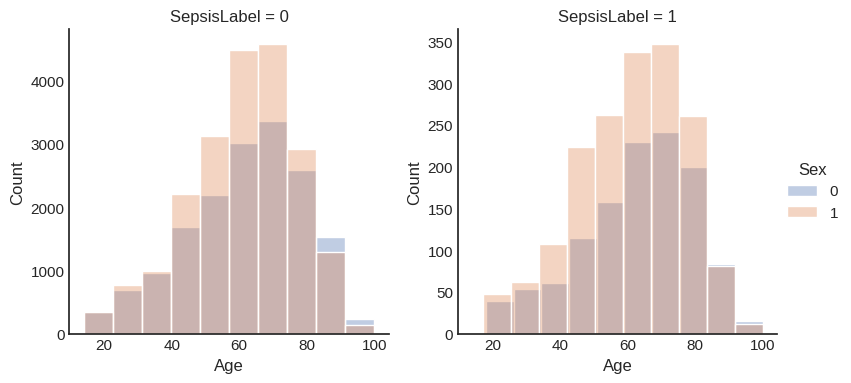

In [29]:
g = sns.FacetGrid(df1, col = 'SepsisLabel', hue = 'Sex', sharey = False, height = 4, aspect = 1)
g.map(sns.histplot, 'Age', bins = 10, alpha = 0.35)
g.add_legend(title='Sex')

## Data Missingness
Data *missingness* is defined as the absence of data entries in a dataset where values are expected but not recorded. Rubin distinguished three missing data mechanisms: missing completely at random (MCAR), missing at random (MAR), and missing not at random (MNAR), whereas other researchers consider additional mechanisms, such as structurally missing data. These mechanisms are defined as follows:
* *Structurally missing:* data that are missing for a logical reason, i.e., because it should not exist (e.g., the number of children for couples that do not have children);
* *Missing completely at random (MCAR):* data are missing randomly, with no relation to anything else in the data set (ex., laboratory values do not exist because the sample was discarded);
* *Missing at random (MAR)*: data missingness is related to some other features in the dataset;
* *Missing not at random (MNAR)*: data missingness is related to something that is not known. 

Most imputation approaches focus on MCAR and MAR data, whereas the more complex MNAR is less explored, even though MNAR can never be ruled out as a mechanism. Identifying the specific missing mechanism can be difficult, and requires subject matter expertise. Furthermore, multiple mechanisms may coexist in a given dataset, and overlooking these aspects may limit the ability of an imputation model to provide accurate imputations. 

The most likely mechanism in this dataset is MNAR (missing not at random). Several aspects will be discussed here to justify why. Vital signs that can be readily monitored in an ICU setting (temperature, blood pressure, respiration rate) are missing in proportion of up to 30%, while physiological variables that require laboratory analysis are missing 60% of the time or more (**Figure 2**). Hospitals prioritize processing of laboratory samples for ICU patients, a critical decision for unstable conditions like sepsis. However, a balance must be maintained, as there is evidence of negative consequences of excessive laboratory testing in ICU settings, such as anemia risk, patient discomfort, and unnecessary costs. 

Furthermore, it is known that some physiological parameters have a diurnal variation which can bias analysis. Examples are total and direct bilirubin, albumin, blood urea nitrogen, uric acid, sodium, and potassium. Diurnal variations of hematocrit, hemoglobin, and white blood count have long been documented, and attributed to, but not completely explained by postural changes. 
**Figure 3** illustrates for a few features that the time elapsed between successive measurements is not random, but rather has a pattern in many patients, occurring at intake time, at 6 hours, 24 hours, etc.

To conclude, this interplay among the need for an accurate assessment of the patient's condition, while avoiding excessive testing and ruling out variations without clinical significance suggest that the most likely mechanism is **missing not at random (MNAR).**

**Figure 2. Percent of data missing for each feature.**

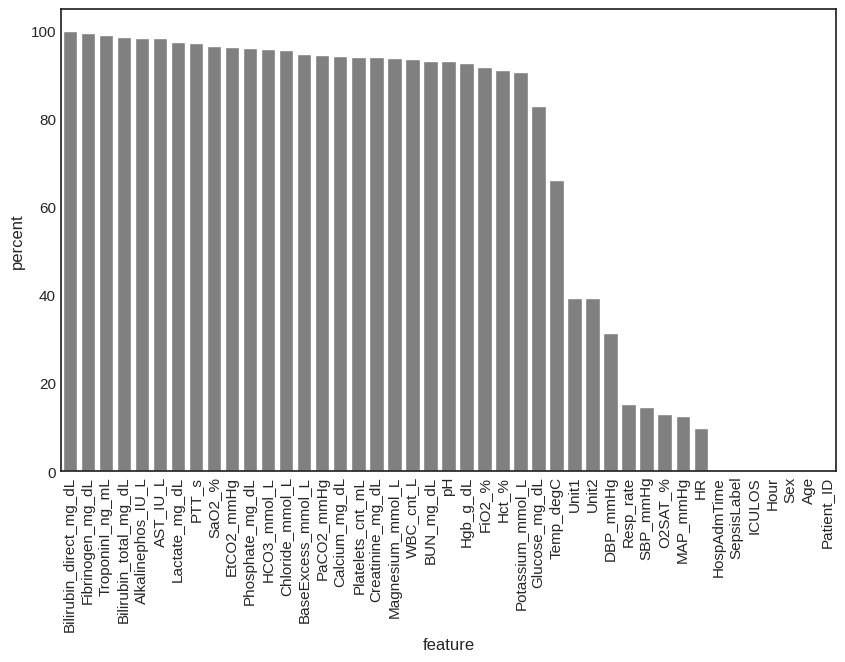

In [5]:
df1 = percent_missing_sorted(df)
plt.figure(figsize = (10,6))
ax = sns.barplot(df1, x = 'feature', y = 'percent', color= 'grey' )
ax.set_xticklabels(df1.feature, rotation = 90)
plt.show()

**Figure 3. Measurement intervals for white blood count (WBC), hemoglobin (HGB), and fibrinogen.**

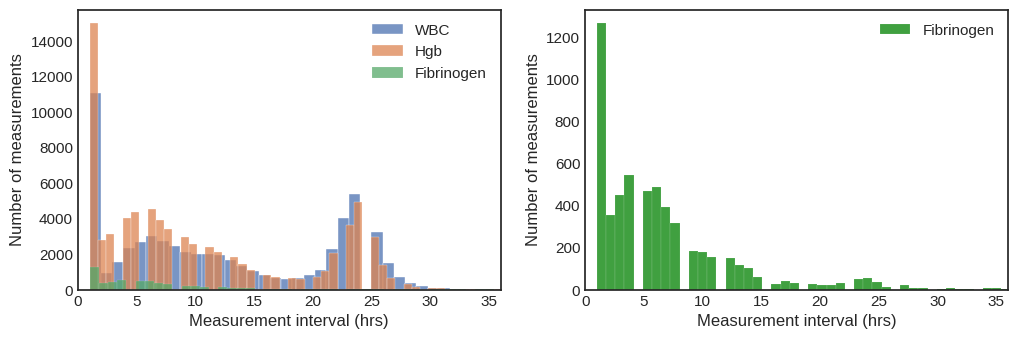

In [114]:
fig = plt.figure(figsize=(12,8))
axs0 = fig.add_subplot(2,2,1)
sns.histplot(df1, x='Hour', label='WBC', ax = axs0)
sns.histplot(df2, x = 'Hour', label = 'Hgb', ax = axs0)
sns.histplot(df4, x = 'Hour', label = 'Fibrinogen', ax = axs0)
plt.legend()
plt.xlim(0, 36)
plt.xlabel('Measurement interval (hrs)')
plt.ylabel('Number of measurements')

axs1 = fig.add_subplot(2,2,2)
sns.histplot(df4, x = 'Hour', label = 'Fibrinogen', ax = axs1, color = 'green')
plt.legend()
plt.xlim(0, 36)
plt.xlabel('Measurement interval (hrs)')
plt.ylabel('Number of measurements')
plt.show()

## Temporal Pattern of Physiological Variables

An analysis of the variation over time of the physiological variables revealed differences between the sepsis patients and non-sepsis patients. 

An analysis of lactate levels (*Lactate_mg_dL*) for selected patients revealed that the two diagnostic groups displayed different patterns (**Figure 4**). In non-sepsis patients, an initial increase was followed by a decrease, while in the sepsis patients, an initial decrease was followed by an increase. Overall, the lactate levels were within normal limits. However, notice the lactate approaching 12 mg/dL in the sepsis patient. Interestingly, research has found that normal lactate levels are predictive of sepsis outcomes, and there is a threshold of about 1.4 mmol/L (12.6 mg/dL) below which the responses to treatment are favorable.

Another variable with an interesting pattern was the platelet counts, *Platelets_cnt_mL* (not shown here). In non-sepsis patients, platelet counts decreased initially (expected, considering the inflammation), but bounced back to normal levels in most patients analyzed. In sepsis patients, on the other hand, platelet counts decreased and remained at thrombocytopenic levels, below 100,000/$\mu$L. 

Finally, the engineered feature shock index (*ShockIndex*), which will be discussed in the next section, representing the ratio of heart rate to systolic blood pressure, showed a marked difference between the two groups, consistent with existing research. In **Figure 4**, the reader will note that in the non-sepsis patient, the shock index was always less than 0.7 throughout the patient's observation period, while the shock index in the sepsis patient exceeded 0.7 and even 1.0. The clinical significance of these two values was discussed in the Introduction.

This preliminary analysis supports the inclusion of these features in the model and their predictive value.

**Figure 4. Representative time-dependence of Lactate_mg_dL and ShockIndex in two patients.**

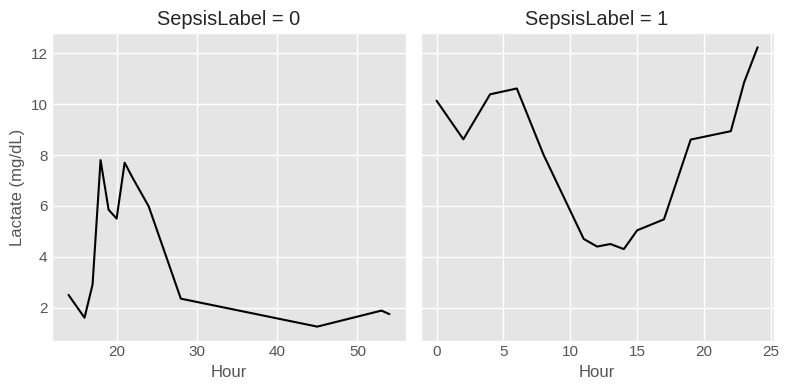

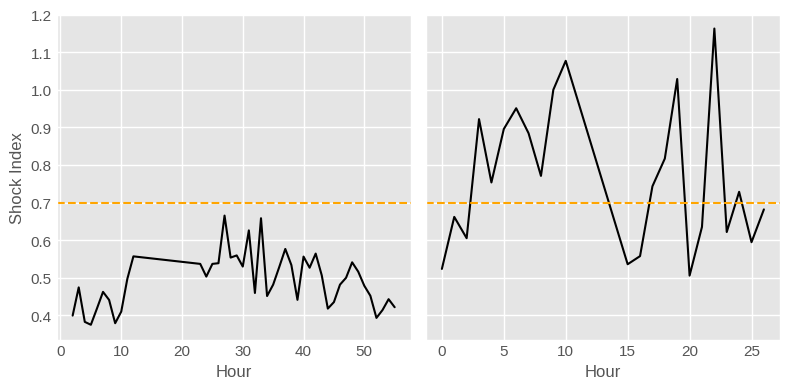

In [119]:
mpl.style.use(['ggplot'])
feature_lineplots_1(complete_cases, 8,4)

# Data Preprocessing 

## Imputation
Imputation was performed separately on the train and test sets in order to avoid data leakage. The panel dataset was split in a train and a test set (80-20), with splitting stratified by patient, such that no information from one patient be present in both train and test sets. The class imbalance of 55.4 (ratio of majority class 0 to minority class 1) was preserved in both sets. 

New features representing missingness indicators were added to both the train and test sets to inform the predictive model that would be trained on the data. For each feature that required imputation, the indicator was 1,  if the respective value was missing, and 0, if the value was present. Afterwards, imputation was done by filling in with the nearest valid value, and was performed separately for each patient.

Although a more complex and robust imputation model such as Multiple Imputation by Chain Equations (MICE), using `scikit-learn`'s `IterativeImputer` or the Random Forest-based packages `miceforest` or `missforest` would have been more desirable considering the MNAR missingness mechanism, this approach was not computationally feasible with the available resources. Imputation by other means, such as median or mean, or most frequent value was not acceptable, as these methods could have obscured clinically relevant fluctuation in values. 

## Effect of Imputation on Correlated Variables
Prior to imputation, the most strongly correlated features (a correlation coefficient > 0.6) were: 
* mean arterial pressure, systolic blood pressure, and diastolic blood pressure; 
* bicarbonate ion, pH, and bicarbonate excess;
* arterial blood partial pressure of CO2, and bicarbonate ion; 
* creatinine, phosphate, and blood urea nitrogen;
* bilirubin total and direct; 
* hematocrit and hemoglobin.

All the above correlations are reasonable from a clinical viewpoint.

As **Figure 5** illustrates for a subset of features, imputation weakened all correlations. Most notable was the case of bilirubin. Recall, however, that bilirubin had the highest percentage missing, and was missing altogether in some patients. Feature *Age* shows no change, as there were no missing values there, so imputation was not performed on this feature.

**FIgure 5. Changes in correlation coefficients between numerical features due to imputation.**

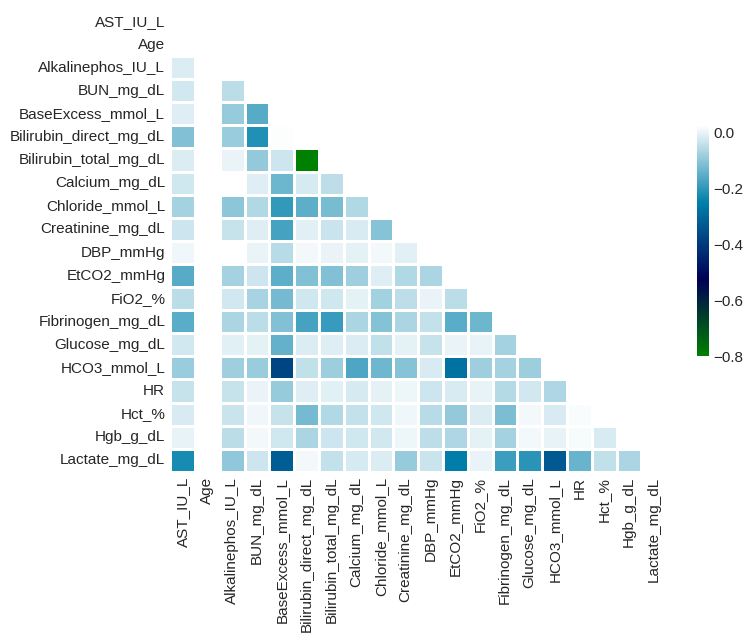

In [60]:
corr_subset = corr - corr_0
corr_subset = corr_subset.iloc[:20,:20]

mask = np.triu(np.ones_like(corr_subset, dtype=bool))
plt.figure(figsize = (8,6))
ax = sns.heatmap(corr_subset, mask = mask, cmap = 'ocean', linewidths=1, annot_kws={"size": 8}, cbar_kws={"shrink": .5})

## Feature Engineering
In addition to the missingness indicators, several new features were added to the data. As discussed in Section 2.2, a number of combination variables have clinical significance and were added to the data: the shock index ($\frac{HR}{SBP\_mmHg})$, the lactate-to-hematocrit ratio ($\frac{Lactate\_mg\_dL}{HCT}$), and the BUN-to-creatinine ratio ($\frac{BUN}{Creatinine\_mg\_dL}$). Furthermore, a flag variable indicating whether the platelets were low (less than 150,000 per microliter) was also added. Measures of heart rate variability were not included. Although heart rate variability is an important predictor, it requires frequency spectrum information that could not be combined with this dataset. 

Before training, the patient identifier and feature *Hour* were dropped. The patient identifier was not informative from a predictive standpoint; leaving *Hour* in the data would have made the model over-reliant on this feature. However, as the predictive model chosen for this task, *XGBoost*, assumes that the observations are independent, a time dependence was modeled by means of variable ICULOS (ICU length of stay). Including ICULOS was a valid decision, as this information was available every hour and clinically relevant.The Physionet Challenge was designed for real-time prediction of sepsis, so ICULOS was a legitimate feature in this context and did not incur the risk of data leakage. The resulting train and test datasets had 81 features.

## Considerations for Imbalanced Classes
With a minority class (sepsis cases) consisting of approximately 1.8% of observations, this panel dataset was highly imbalanced. In the current scientific literature, there is no consensus on how methods for handling class imbalance impact the performance of clinical prediction models. The use of random oversampling or random undersampling for handling unbalanced classes in healthcare data for disease prediction is generally not recommended, especially in large observational health datasets. 

In the light of these observations, along with the fact that the task at hand concerned predicting an unstable disease condition, the choice was made to not use any sampling methods, but rather choose an appropriate model and inform it a priori of the class imbalance.

# The Model
## Model Selection
The dataset does not exhibit the temporal structure typical of time series, as features tend to be recorded at irregular intervals, resulting in a high degree of sparsity for important predictors. As a result, this dataset was treated as a panel dataset, with time as a feature rather than a defining structure. The classifier of choice for this task had to satisfy the following:
1. ability to handle imbalanced classes effectively;
2. ability to handle many features;
3. resilience to multicollinearity (correlated features);
4. parallelization and regularization functionality.

The natural choice was *XGBoost.* 

## Metrics

The choice of performance metrics is very important for a classification task involving highly imbalanced classes. *Accuracy*, defined as the percent of correct predictions, is not a good metric here, as it will favor the majority class. In general, for disease detection, minimizing the false negatives is preferable to minimizing false positives. The metric of choice is *recall*, also known as true positive rate or sensitivity, defined as the percent or correctly classified actual positives. *Precision* is the proportion of all positive classifications that are actually positive. The *F1-score* is the harmonic mean of precision and recall, and balances the importance of precision and recall. It is preferable to accuracy for class-imbalanced datasets. 

The *receiver operating characteristic* (ROC) curve is a graphical representation of model performance across all thresholds. A robust model operates well across all thresholds, thus the area under the ROC curve (AUROC or AUC-ROC) is a good measure for comparing the performance of different models; however, the dataset must be relatively balanced. The *precision-recall* (PR) curve, which plots precision vs recall, illustrates the trade-off between precision and recall, and describes the performance of the model on predicting the positive class. Therefore, it is particularly informative for evaluating classifiers on imbalanced datasets. AUCPR is the area under the PR curve; it does not depend on the number of true negatives, so it is robust to imbalanced datasets, where the negatives are the majority class. Thus, AUCPR is a more reliable metric than AUROC when the positive class is of primary interest, such as disease diagnosis.

Since both recall and the F1-score are relevant for this task, model optimization took both metrics into consideration.

## Hyperparameter Tuning

All work, except for hyperparameter tuning, was completed on a Debian/Ubuntu Linux Mint system with 12 GB RAM, and 8 Intel i7-8650U processors running at 1.90 GHz. Hyperparameter tuning exceeded the local computational power and was conducted on Google Colab. In order to optimize memory use, parameter `njobs` was set to -1 when using `GridSearchCV`, as XGBoost's documentation advises that letting XGBoost to run in parallel is better than of asking `GridSearchCV` to run multiple experiments at the same time.

Several XGBoost parameters were tuned, including L1 and L2 regularization parameters. The parameter that informs the model of the class imbalance was also a tunable parameter. For a highly imbalanced dataset, using the square root of the class weight may produce better results, and that was the case here. Class weight is defined as the ratio of the number of observations in the majority class to the ratio of the observations in the minority class. 

Model tuning was performed on Google Colab  using a 5-fold stratified cross-validation with shuffling disabled in order to preserve the order of the observations. Two models were tuned, one using the F1-score and the second using recall. A third model with regularization was tuned as well. 

## Performance Evaluation

**Table 3** displays the results on the train and test sets. Models were compared in terms of the best AUCPR on the test set, as AUCPR is the most relevant metric to compare models for this task. The best model was optimized usint he F1-score as scoring metric. Regularization only produced a very slight improvement in the recall score.

The best model had 90 estimators (trees), a learning rate of 0.1, a minimum child weight of 1, and a maximum depth of 4. The parameter that controls class weights, `scale_pos_weight` was $\sqrt{55.4}$. Including all original features and engineered features yielded the best performance. (*The learning rate controls the step size during each boosting iteration, and determines how much each tree contributes to the overall prediction; the minimum child weight is the minimum amount of data needed to make split in a tree, a value of 1 is advisable when dealing with imbalanced classes; maximum depth controls how many splits a tree can make.*)

**Table 3. Model optimization results.**
___

In [129]:
(res_final.style.set_table_styles([
                           {'selector': '.row_heading', 'props': [('text-align', 'left')]}])
                     .format(precision = 3).applymap(color_green, subset = ['AUCPR','f1-score']))

,model,precision,recall,f1-score,accuracy,AUROC,AUCPR,data
0,Metric: f1-score,0.171,0.194,0.182,0.971,0.827,0.119,test
1,Metric: recall,0.192,0.175,0.183,0.967,0.823,0.108,test
2,"Metric: f1-score, w/ reg.",0.155,0.195,0.173,0.972,0.827,0.118,test
3,Metric: f1-score,0.239,0.222,0.230,0.972,0.863,0.162,train
4,Metric: recall,0.289,0.245,0.265,0.972,0.887,0.195,train
5,"Metric: f1-score, w/ reg.",0.224,0.218,0.221,0.972,0.854,0.152,train


**Table 4** compares the model optimized for the F1-score and the one optimized for recall in terms of how they ranked the predictive value of features. Both models assigned the most importance to the length of stay in the ICU (ICULOS). Interestingly, the latter model assigned proportionally less importance to variable ICULOS.  The reader may recall the earlier discussion that the inclusion of ICULOS in the model was justified, as the goal of the model was to predict sepsis in real-time. Removing ICULOS led to a notable decrease in performance. 

Both models ranked the missingness of lactate levels and fraction of inspired oxygen as the next important features. As discussed in Section 1 and observed in Section 3, lactate is a strong marker for inflammation, and its absence or presence in the patient's records may be indicative of the severity of the patient's condition. The best model also ranked highly the engineered feature *ShockIndex*, confirming that the choice of including this feature was appropriate.

**Table 4. Feature importance. Left: Model tuned for best f1-score. Right: model tuned for best recall score.**
___

In [60]:
n_features = 25
pd.merge(var_imp_01(model_f1,X_train.columns,n_features).reset_index(), 
         var_imp_01(model_recall,X_train.columns,n_features).reset_index(), 
         left_index = True, right_index=True).drop(['index_x','index_y'], axis = 1)

,Feature_x,Importance_x,Feature_y,Importance_y
0,ICULOS,0.154677,ICULOS,0.117506
1,Lactate_mg_dL_missing,0.055891,Lactate_mg_dL_missing,0.064654
2,FiO2_%_missing,0.048741,FiO2_%_missing,0.063698
3,ShockIndex,0.041289,Temp_degC,0.043431
4,Temp_degC,0.039901,EtCO2_mmHg_missing,0.036713
5,EtCO2_mmHg_missing,0.033643,ShockIndex,0.035180
6,HR,0.029144,pH_missing,0.033732
7,BUN_mg_dL,0.027789,Resp_rate,0.029878
8,Resp_rate,0.027027,BUN_mg_dL,0.026418
9,HospAdmTime,0.024480,HR,0.026379


# Discussion

## Comparison with Challenge Project Results
  
A total of 104 groups from academia and industry participated in the Challenge, contributing 853 submissions. The participants submitted their algorithms to a cloud-based testing environment, where their entries were graded using a utility metric specifically designed for the Challenge by its authors. The metric rewarded algorithms for early predictions and penalized them for late or missed predictions and for false alarms. In the absence of this customized scoring function, the performance of the best model described in this work was compared to those of the top three winning teams, as teams published their training and testing scores using standard metrics as well. Their results are presented in **Table 5.** The Challenge made available two datasets, A and B, and withheld dataset C for scoring. The dataset currently available on OpenML.org appears to be sets A and B combined.

**Table 5. Early Prediction of Sepsis Challenge Results.** NR = not reported. The performance metrics shown were the best scores, obtained using a test set from dataset B.
___
<table>
<tr><td>Team</td><td>Rank</td><td>ACC</td><td>f1-score</td><td>AUROC</td><td>AUCPR</td><td>Model</td></tr>
<tr><td>Can I get your signature?</td><td>1</td><td>NR</td><td>NR</td><td>0.868</td><td>NR</td><td>signature-based light gbm regression model</td></tr>
<tr><td>Sepsysd</td><td>2</td><td>0.901</td><td>0.142</td><td>0.853</td><td>0.119</td><td> XGBoost with weighted cross-entropy loss function</td></tr>
<tr><td>Separatrix</td><td>3</td><td>NR</td><td>0.130</td><td>0.844</td><td>0.110</td><td>ensemble of 5 XGBoost models</td></tr>
<tr><td>Model in this report</td><td></td><td>0.971</td><td>0.182</td><td>0.827</td><td>0.119</td><td>XGBoost</td></tr>
</table>

The top team optimized the threshold for their model, and used that threshold for their predictions. They reported a remarkable recall of 0.653, but it is not clear on which dataset. 

The model described in this report was trained on 80% and tested on 20% of sets A and B combined, as no information was available regarding specific observations belonging to sets A or B. Its performance on the available data exceeds that of winners 2 and 3 for the metrics that are most relevant for imbalanced datasets (F1-score and AUCPR). 

## Other Considerations

Along with the panel dataset, an aggregated dataset was created to use for testing imputation methods and identify important features. In the aggregated dataset, consisting of 40336 rows and 39 columns, each row represented an individual patient's history. Columns were obtained by calculating mean and standard deviation for physiological variables, along with age and sex. The aggregated dataset contained missing values as well, as some physiological variables were not recorded at all in some patients. Both a Random Forest and an XGBoost classifier were trained on this set and returned similar feature rankings. This step was done in an attempt to perform feature selection; however, the best performance of the model trained on the full dataset required all the features. Interestingly on this smaller dataset, the Random Forest classifier outperformed XGBoost, which is not unusual on smaller datasets. (Recall: 0.55 vs 0.25; AUCPR: 0.277 vs 0.218). 

## Conclusions and Future Work

This was an interesting opportunity to illustrate the importance of understanding the data along with subject matter expertise. As the XGBoost developers put it:
> *Know your data. It cannot be stressed enough the importance of understanding the data, sometimes that’s all it takes to get a good model. Many solutions use a simple XGBoost tree model without much tuning and emphasize the data pre-processing step.*

The model could be improved such that more sepsis patients are identified correctly. The best way to improve a model is by improving the data. Important predictors could be added, such as the neutrophil-to-lymphoycyte ratio(NLR), a marker that can be readily calculated from blood count differentials. Elevated NLR is associated with poor prognosis in various diseases, and is a prognostic indicator in critical illness such as sepsis; values above 11 indicate severe disease, and a decline below 7 is associated with improved clinical outcomes and lower mortality risk in sepsis. 
  
Imputation was done using the nearest valid value due to computational constraints. Random Forest-based imputation methods have been shown to be the best performers when handling data that are not missing at random (MNAR). They are, however, computationally expensive. Furthermore, multiple imputation by chained equations (MICE) is preferred for data with high percentages of missing values. An interesting continuation of this project would be comparing the effects of different imputation methods on the panel dataset, if more computational resources are available.

Finally, the model is not calibrated. In general *XGBoost* does not produce well-calibrated probabilities. Reliability of class predictions is crucial in healthcare, where the accuracy of a medical diagnosis is important, as it involves assessing and managing risk. Calibration ensures that its output is reliable and trustworthy. 

On a final note, sepsis is, in essence, a dysregulated immune response, lacking the balance between hyperactivation and hyporesponsiveness. Integrating immunological biomarkers, clinical information, and machine learning to create a patient profile and improve outcomes makes perfect sense in view of current trends towards precision medicine.

# References

## References for Section 2.1 (Introduction)
* Reyna MA, Josef CS, Jeter R, Shashikumar SP, Westover MB, Nemati S, Clifford GD, Sharma A. Early Prediction of Sepsis From Clinical Data: The PhysioNet/Computing in Cardiology Challenge. Critical Care Medicine 48 2: 210-217 (2019). https://doi.org/10.1097/CCM.0000000000004145
* Reyna, M., Josef, C., Jeter, R., Shashikumar, S., Moody, B., Westover, M. B., Sharma, A., Nemati, S., & Clifford, G. D. (2019). Early Prediction of Sepsis from Clinical Data: The PhysioNet/Computing in Cardiology Challenge 2019 (version 1.0.0). PhysioNet. RRID:SCR_007345. https://doi.org/10.13026/v64v-d857
* Goldberger, A., Amaral, L., Glass, L., Hausdorff, J., Ivanov, P. C., Mark, R., ... & Stanley, H. E. (2000). PhysioBank, PhysioToolkit, and PhysioNet: Components of a new research resource for complex physiologic signals. Circulation [Online]. 101 (23), pp. e215–e220. RRID:SCR_007345.
  

## References for Section 2.2 (Sepsis Predictors)
* Lever A, Mackenzie I. Sepsis: definition, epidemiology, and diagnosis. BMJ. 2007 Oct 27;335(7625):879-83. doi: 10.1136/bmj.39346.495880.AE. PMID: 17962288; PMCID: PMC2043413. https://pmc.ncbi.nlm.nih.gov/articles/PMC2043413/#sec5
* Merck Manual. https://www.merckmanuals.com/professional/multimedia/table/sequential-organ-failure-assessment-sofa-score
* Lambden, S., Laterre, P.F., Levy, M.M. et al. The SOFA score—development, utility and challenges of accurate assessment in clinical trials. Crit Care 23, 374 (2019). https://doi.org/10.1186/s13054-019-2663-7 https://ccforum.biomedcentral.com/articles/10.1186/s13054-019-2663-7
* Sarika Gupta, Areesha Alam, Shock index is better than conventional vital signs for assessing higher level of care and mortality in severe sepsis or shock, The American Journal of Emergency Medicine, Volume 46, 2021, Pages 545-549, ISSN 0735-6757,
https://doi.org/10.1016/j.ajem.2020.11.014. (https://www.sciencedirect.com/science/article/pii/S073567572031024X)
* Berger T, Green J, Horeczko T, Hagar Y, Garg N, Suarez A, Panacek E, Shapiro N. Shock index and early recognition of sepsis in the emergency department: pilot study. West J Emerg Med. 2013 Mar;14(2):168-74. doi: 10.5811/westjem.2012.8.11546. PMID: 23599863; PMCID: PMC3628475. https://pmc.ncbi.nlm.nih.gov/articles/PMC3628475/
* Yumin Jeon, Sungjin Kim, Sejoong Ahn, Jong-Hak Park, Hanjin Cho, Sungwoo Moon, Sukyo Lee,
Predicting septic shock in patients with sepsis at emergency department triage using systolic and diastolic shock index,
The American Journal of Emergency Medicine, Volume 78, 2024, Pages 196-201, ISSN 0735-6757, https://doi.org/10.1016/j.ajem.2024.01.029. (https://www.sciencedirect.com/science/article/pii/S0735675724000287)
* Hasselgren PO, Fischer JE. Sepsis: stimulation of energy-dependent protein breakdown resulting in protein loss in skeletal muscle. World J Surg. 1998 Feb;22(2):203-8. doi: 10.1007/s002689900370. PMID: 9451937. https://pubmed.ncbi.nlm.nih.gov/9451937/
* Voelkl J, Egli-Spichtig D, Alesutan I, Wagner CA. Inflammation: a putative link between phosphate metabolism and cardiovascular disease. Clin Sci (Lond). 2021 Jan 15;135(1):201-227. doi: 10.1042/CS20190895. PMID: 33416083; PMCID: PMC7796315. https://pmc.ncbi.nlm.nih.gov/articles/PMC7796315/
* Wei S, Li Y, Zhang C, Guo X, Liang X, Huang Y, Zhang F, Li J, Liu Q. Prognostic value of serum phosphate levels in sepsis: a systematic review and meta-analysis. PeerJ. 2023 Oct 13;11:e16241. doi: 10.7717/peerj.16241. PMID: 37849826; PMCID: PMC10578301. https://pmc.ncbi.nlm.nih.gov/articles/PMC10578301/
* Craig N. Morrell, Angela A. Aggrey, Lesley M. Chapman, Kristina L. Modjeski; Emerging roles for platelets as immune and inflammatory cells. Blood 2014; 123 (18): 2759–2767. doi: https://doi.org/10.1182/blood-2013-11-462432
* Dewitte, A., Lepreux, S., Villeneuve, J. et al. Blood platelets and sepsis pathophysiology: A new therapeutic prospect in critical ill patients?. Ann. Intensive Care 7, 115 (2017). https://doi.org/10.1186/s13613-017-0337-7
* Wang Danni, Wang Suning, Wu Hao, Gao Jiansheng, Huang Kairong, Xu Danhong, Ru Huangyao, Association Between Platelet Levels and 28-Day Mortality in Patients With Sepsis: A Retrospective Analysis of a Large Clinical Database MIMIC-IV, Frontiers in Medicine, Volume 9, 2022 URL=https://www.frontiersin.org/journals/medicine/articles/10.3389/fmed.2022.833996
* Assinger Alice, Schrottmaier Waltraud C., Salzmann Manuel, Rayes Julie , Platelets in Sepsis: An Update on Experimental Models and Clinical Data, Frontiers in Immunology, Volume 10, 2019. URL=https://www.frontiersin.org/journals/immunology/articles/10.3389/fimmu.2019.01687
* Vardon-Bounes F, Ruiz S, Gratacap MP, Garcia C, Payrastre B, Minville V. Platelets Are Critical Key Players in Sepsis. Int J Mol Sci. 2019 Jul 16;20(14):3494. doi: 10.3390/ijms20143494. PMID: 31315248; PMCID: PMC6679237. https://pmc.ncbi.nlm.nih.gov/articles/PMC6679237/
* Wang Jun, Zhou Pan, Li Xin, Zhou Li, Deng Zhe, Association between platelet count and 30-day in-hospital mortality among intensive care unit patients with sepsis: a multicenter retrospective cohort study, Frontiers in Medicine, Volume 11, 2025 URL=https://www.frontiersin.org/journals/medicine/articles/10.3389/fmed.2024.1444481
* Duan Wentao , Yang Feng , Ling Hua , Li Qiong , Dai Xingui, Association between lactate to hematocrit ratio and 30-day all-cause mortality in patients with sepsis: a retrospective analysis of the Medical Information Mart for Intensive Care IV database, Frontiers in Medicine, Volume 11, 2024, https://www.frontiersin.org/journals/medicine/articles/10.3389/fmed.2024.1422883, doi=10.3389/fmed.2024.1422883
* Han D, Zhang L, Zheng S, Xu F, Li C, Yang R, Ma W, Yin H, Lyu J. Prognostic Value of Blood Urea Nitrogen/Creatinine Ratio for Septic Shock: An Analysis of the MIMIC-III Clinical Database. Biomed Res Int. 2021 May 22;2021:5595042. doi: 10.1155/2021/5595042. PMID: 34095304; PMCID: PMC8164535. https://pmc.ncbi.nlm.nih.gov/articles/PMC8164535/
* Arbo JE, Lessing JK, Ford WJH, Clark S, Finkelsztein E, Schenck EJ, Sharma R, Heerdt PM. Heart rate variability measures for prediction of severity of illness and poor outcome in ED patients with sepsis. Am J Emerg Med. 2020 Dec;38(12):2607-2613. doi: 10.1016/j.ajem.2020.01.012. Epub 2020 Jan 7. PMID: 31982224; PMCID: PMC7338243. https://pmc.ncbi.nlm.nih.gov/articles/PMC7338243/#S5
* Fábio M. de Castilho, Antonio Luiz P. Ribeiro, José Luiz P. da Silva, Vandack Nobre, Marcos R. de Sousa, Heart rate variability as predictor of mortality in sepsis: A prospective cohort study. PLOS ONE, June 2017. DOI	10.1371/journal.pone.0180060. https://journals.plos.org/plosone/article/authors?id=10.1371/journal.pone.0180060
* Jin Zhu, Yanyan Dong, Pengda Liao, Xin Yin, Jianzhuo He, Liheng Guo, Prognostic value of hemoglobin in patients with sepsis: A systematic review and meta-analysis, Heart & Lung, Volume 64, 2024, Pages 93-99, https://doi.org/10.1016/j.hrtlng.2023.12.001
* Yang, Z., Cui, X. & Song, Z. Predicting sepsis onset in ICU using machine learning models: a systematic review and meta-analysis. BMC Infect Dis 23, 635 (2023). https://doi.org/10.1186/s12879-023-08614-0 

## References for Section 3.3 (Data Missingness)
* Cheng LF, Prasad N, Engelhardt BE. An Optimal Policy for Patient Laboratory Tests in Intensive Care Units. Pac Symp Biocomput. 2019;24:320-331. PMID: 30864333; PMCID: PMC6417830. https://pmc.ncbi.nlm.nih.gov/articles/PMC6417830/
* Michael E. Ezzie, Scott K. Aberegg, James M. O'Brien, Laboratory Testing in the Intensive Care Unit, Critical Care Clinics,
Volume 23, Issue 3, 2007, Pages 435-465, ISSN 0749-0704, https://doi.org/10.1016/j.ccc.2007.07.005.
* Fox WR, Diercks DB. Troponin assay use in the emergency department for management of patients with potential acute coronary syndrome: current use and future directions. Clin Exp Emerg Med. 2016 Mar 31;3(1):1-8. doi: 10.15441/ceem.16.120. PMID: 27752608; PMCID: PMC5051615. https://pmc.ncbi.nlm.nih.gov/articles/PMC5051615/
* Alicja R. Rudnicka, PhD, Ann Rumley, PhD, Gordon D.O. Lowe, DSc, and David P. Strachan, Diurnal, Seasonal, and Blood-Processing Patterns in Levels of Circulating Fibrinogen, Fibrin D-Dimer, C-Reactive Protein, Tissue Plasminogen Activator, and von Willebrand Factor in a 45-Year-Old Population, Circulation, Volume 115, Number 8, https://doi.org/10.1161/CIRCULATIONAHA.106.63516
* A. H. İhtiyar, M. Köseoğlu, and F. D. Arslan, “The Effect of Diurnal Variation on Laboratory Tests”, JBACHS, vol. 7, no. 1, pp. 387–395, 2023, doi: 10.30621/jbachs.1122518. https://dergipark.org.tr/en/pub/jbachs/issue/75677/1122518
* Pocock SJ, Ashby D, Shaper AG, Walker M, Broughton PM. Diurnal variations in serum biochemical and haematological measurements. J Clin Pathol. 1989 Feb;42(2):172-9. doi: 10.1136/jcp.42.2.172. PMID: 2921359; PMCID: PMC1141821. https://pmc.ncbi.nlm.nih.gov/articles/PMC1141821/
* Feriel J, Tchipeva D, Depasse F. Effects of circadian variation, lifestyle and environment on hematological parameters: A narrative review. Int J Lab Hematol. 2021; 43: 917–926. https://doi.org/10.1111/ijlh.13590 
*E. F. Mccarthy and Donald D. Van Slyke, DIURNAL VARIATIONS OF HEMOGLOBIN IN THE BLOOD OF NORMAL MEN, Journal of Biological Chemistry, 1939, vol. 128, pp. 567-572, https://api.semanticscholar.org/CorpusID:83057084
* Rubin DB. Multiple imputation for nonresponse in surveys, vol 81. John Wiley & Sons, 2004.
* Zhou et al, A Comprehensive Review of Handling Missing Data: Exploring Special Missing Mechanisms, https://arxiv.org/html/2404.04905v1

## References for Section 3.4 (Temporal Pattern)
* Wacharasint P, Nakada TA, Boyd JH, Russell JA, Walley KR. Normal-range blood lactate concentration in septic shock is prognostic and predictive. Shock. 2012 Jul;38(1):4-10. doi: 10.1097/SHK.0b013e318254d41a. PMID: 22552014.
Format:(https://pubmed.ncbi.nlm.nih.gov/22552014/))
* Buonacera A, Stancanelli B, Colaci M, Malatino L. Neutrophil to Lymphocyte Ratio: An Emerging Marker of the Relationships between the Immune System and Diseases. Int J Mol Sci. 2022 Mar 26;23(7):3636. doi: 10.3390/ijms23073636. PMID: 35408994; PMCID: PMC8998851.
* Song, M., Graubard, B.I., Rabkin, C.S. et al. Neutrophil-to-lymphocyte ratio and mortality in the United States general population. Sci Rep 11, 464 (2021). https://doi.org/10.1038/s41598-020-79431-7

## References for Section 4.1 (Imputation)
* Austin PC, White IR, Lee DS, van Buuren S. Missing Data in Clinical Research: A Tutorial on Multiple Imputation. Can J Cardiol. 2021 Sep;37(9):1322-1331. doi: 10.1016/j.cjca.2020.11.010. Epub 2020 Dec 1. PMID: 33276049; PMCID: PMC8499698
* Jakobsen, J.C., Gluud, C., Wetterslev, J. et al. When and how should multiple imputation be used for handling missing data in randomised clinical trials – a practical guide with flowcharts. BMC Med Res Methodol 17, 162 (2017). https://doi.org/10.1186/s12874-017-0442-1
  

## References for Section 4.4 (Class Imbalance)
* Yang, C., Fridgeirsson, E.A., Kors, J.A. et al. Impact of random oversampling and random undersampling on the performance of prediction models developed using observational health data. J Big Data 11, 7 (2024). https://doi.org/10.1186/s40537-023-00857-7

## References for Section 6.1 (Comparison with Challenge)
* Early Prediction of Sepsis from Clinical Data: The PhysioNet/Computing in Cardiology Challenge 2019. https://moody-challenge.physionet.org/2019/results/
* James Morrill, Andrey Kormilitzin, Alejo Nevado-Holgado, Sumanth Swaminathan, Sam Howison, Terry Lyons, The Signature-Based Model for Early Detection of Sepsis From Electronic Health Records in the Intensive Care Unit, Computing in Cardiology 2019; Vol 46, https://www.cinc.org/archives/2019/pdf/CinC2019-014.pdf
* John Anda Du, Nadi Sadr, Philip de Chazal, Automated Prediction of Sepsis Onset Using Gradient Boosted Decision Trees, Computing in Cardiology 2019; Vol 46, https://www.cinc.org/archives/2019/pdf/CinC2019-423.pdf
* Morteza Zabihi, Serkan Kiranyaz, Moncef Gabbouj, Sepsis Prediction in Intensive Care Unit Using Ensemble of XGboost Models, Computing in Cardiology 2019; Vol 46, https://www.cinc.org/archives/2019/pdf/CinC2019-238.pdf



## References for Section 6.3 (Conclusions)
* XGboost Documentation: Parameter Tuning: https://xgboost.readthedocs.io/en/stable/tutorials/param_tuning.html     
* Buonacera A, Stancanelli B, Colaci M, Malatino L. Neutrophil to Lymphocyte Ratio: An Emerging Marker of the Relationships between the Immune System and Diseases. Int J Mol Sci. 2022 Mar 26;23(7):3636. doi: 10.3390/ijms23073636. PMID: 35408994; PMCID: PMC8998851. https://pmc.ncbi.nlm.nih.gov/articles/PMC8998851/
* Song, M., Graubard, B.I., Rabkin, C.S. et al. Neutrophil-to-lymphocyte ratio and mortality in the United States general population. Sci Rep 11, 464 (2021). https://doi.org/10.1038/s41598-020-79431-7 https://www.nature.com/articles/s41598-020-79431-7
* XGBoost Tutorials Notes on Parameter Tuning: https://xgboost.readthedocs.io/en/stable/tutorials/param_tuning.html
* Niculescu-Mizil A and Caruana R, Predicting Good Probabilities with Supervised Learning, ICML 2005
* Profiling the dysregulated immune response in sepsis: overcoming challenges to achieve the goal of precision medicine
Cajander, Sara et al. The Lancet Respiratory Medicine, Volume 12, Issue 4, 305 - 322  https://www.thelancet.com/journals/lanres/article/PIIS2213-2600(23)00330-2/abstract